In [1]:
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

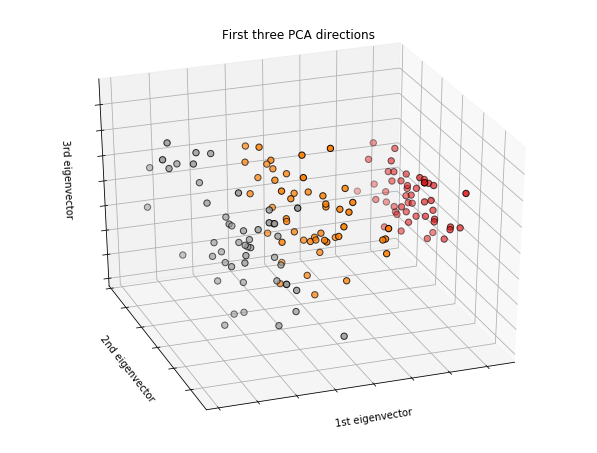

In [2]:
# import the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# figure size
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [3]:
num_epochs = 200
n_labels = np.unique(y).shape[0]
data = Variable(torch.from_numpy(X).float())
labels = Variable(torch.from_numpy(y))

# linear encodes vector of 4 features to vector of 3 outputs
linear = torch.nn.Linear(4, n_labels)
criterion = torch.nn.CrossEntropyLoss()
# optimizer takes the parameters to tune as input and the learning rate
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

# training
for epoch in range(num_epochs):
    # clean gradients
    optimizer.zero_grad()
    # forward throught linear module (eq. Ax + b)
    outputs = linear(data)
    # eval loss with cross-entropy (softmax + negative log likelyhood)
    loss = criterion(outputs, labels)
    # eval gradients wrt each parameters
    loss.backward()
    # update parameters wrt to optimizer and gradients
    optimizer.step()
    
    # predicted is the index of the class with highest probability
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels.data).sum()

    print ('Epoch: [%d/%d], Loss: %.4f, Acc: %d' 
           % (epoch+1, num_epochs, loss.data[0], (100 * correct / labels.size(0))))

Epoch: [1/200], Loss: 2.1471, Acc: 33
Epoch: [2/200], Loss: 1.2270, Acc: 62
Epoch: [3/200], Loss: 0.9051, Acc: 38
Epoch: [4/200], Loss: 0.8095, Acc: 67
Epoch: [5/200], Loss: 0.7796, Acc: 74
Epoch: [6/200], Loss: 0.7550, Acc: 67
Epoch: [7/200], Loss: 0.7341, Acc: 74
Epoch: [8/200], Loss: 0.7165, Acc: 66
Epoch: [9/200], Loss: 0.7018, Acc: 79
Epoch: [10/200], Loss: 0.6917, Acc: 66
Epoch: [11/200], Loss: 0.6850, Acc: 72
Epoch: [12/200], Loss: 0.6882, Acc: 66
Epoch: [13/200], Loss: 0.6919, Acc: 68
Epoch: [14/200], Loss: 0.7177, Acc: 66
Epoch: [15/200], Loss: 0.7185, Acc: 66
Epoch: [16/200], Loss: 0.7617, Acc: 66
Epoch: [17/200], Loss: 0.7301, Acc: 66
Epoch: [18/200], Loss: 0.7752, Acc: 66
Epoch: [19/200], Loss: 0.7207, Acc: 66
Epoch: [20/200], Loss: 0.7661, Acc: 66
Epoch: [21/200], Loss: 0.7076, Acc: 66
Epoch: [22/200], Loss: 0.7546, Acc: 66
Epoch: [23/200], Loss: 0.6954, Acc: 66
Epoch: [24/200], Loss: 0.7440, Acc: 66
Epoch: [25/200], Loss: 0.6843, Acc: 66
Epoch: [26/200], Loss: 0.7341, Acc

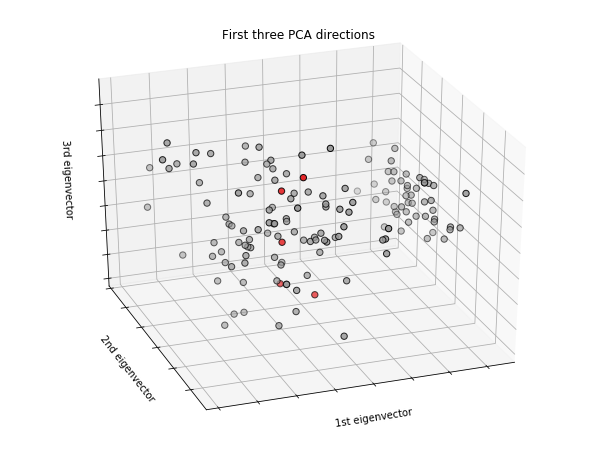

In [4]:
# plot the data with ACP, showing prediction errors in red
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=predicted.numpy()==y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()